In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# General

In [10]:
df = pd.read_csv("StudentPerformanceFactors_Cleaned.csv")

In [12]:
df.tail()

,Unnamed: 0,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6373,6608,39,92,Medium,Medium,No,9,73,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,Postgraduate,Moderate,Male,75
6374,6609,39,95,Medium,High,Yes,9,54,High,Yes,...,Medium,Medium,Private,Positive,3,No,High School,Moderate,Male,77
6375,6610,39,97,High,High,Yes,10,91,Medium,Yes,...,Low,Medium,Public,Positive,3,No,High School,Moderate,Female,79
6376,6611,43,86,High,Medium,Yes,7,97,Medium,Yes,...,Medium,High,Public,Positive,1,No,High School,Near,Female,78
6377,6612,44,68,High,Low,No,9,75,Low,Yes,...,Medium,High,Private,Negative,2,No,High School,Moderate,Female,71


In [20]:
print("(rows, columns) : ")
print(df.shape)

(rows, columns) : 
(6378, 21)


 - `df.info()` allow us to see the missing values in the dataframe.
Here we can see that that we miss values in `Teacher_Quality`, `Parental_Education_Level` and `Distance_from_Home`

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  6378 non-null   int64 
 1   Hours_Studied               6378 non-null   int64 
 2   Attendance                  6378 non-null   int64 
 3   Parental_Involvement        6378 non-null   object
 4   Access_to_Resources         6378 non-null   object
 5   Extracurricular_Activities  6378 non-null   object
 6   Sleep_Hours                 6378 non-null   int64 
 7   Previous_Scores             6378 non-null   int64 
 8   Motivation_Level            6378 non-null   object
 9   Internet_Access             6378 non-null   object
 10  Tutoring_Sessions           6378 non-null   int64 
 11  Family_Income               6378 non-null   object
 12  Teacher_Quality             6378 non-null   object
 13  School_Type                 6378 non-null   obje

# Features
 - Feature (Variable, Attribute): A column in a dataset, representing a measurable property or characteristic of the data
 - `df.columns` allows us to get the dataset features list 

In [26]:
features = df.columns
print("Features list :") 
for f in features:
    print(" - ", f)

Features list :
 -  Unnamed: 0
 -  Hours_Studied
 -  Attendance
 -  Parental_Involvement
 -  Access_to_Resources
 -  Extracurricular_Activities
 -  Sleep_Hours
 -  Previous_Scores
 -  Motivation_Level
 -  Internet_Access
 -  Tutoring_Sessions
 -  Family_Income
 -  Teacher_Quality
 -  School_Type
 -  Peer_Influence
 -  Physical_Activity
 -  Learning_Disabilities
 -  Parental_Education_Level
 -  Distance_from_Home
 -  Gender
 -  Exam_Score


To get all feature infos we use `df[f].describe()` wich gives us : 
 - Number of values
 - Mean
 - Min
 - Three quartiles
 - max value

In [54]:
for f in features:
    print(f" - {f} :")
    print(df[f].describe())
    print()

 - Unnamed: 0 :
count    6378.000000
mean     3306.402634
std      1909.601140
min         0.000000
25%      1655.250000
50%      3303.500000
75%      4964.750000
max      6612.000000
Name: Unnamed: 0, dtype: float64

 - Hours_Studied :
count    6378.000000
mean       19.977109
std         5.985460
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64

 - Attendance :
count    6378.000000
mean       80.020853
std        11.550723
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64

 - Parental_Involvement :
count       6378
unique         3
top       Medium
freq        3251
Name: Parental_Involvement, dtype: object

 - Access_to_Resources :
count       6378
unique         3
top       Medium
freq        3204
Name: Access_to_Resources, dtype: object

 - Extracurricular_Activities :
count     6378
unique       2
top   

Let us analyze the features 1 by 1 :
## Hours studied
 - *Data Type* : int
 - Ordinal numerical variable
### Variable ditribution
 - Histogram
 - Boxplot

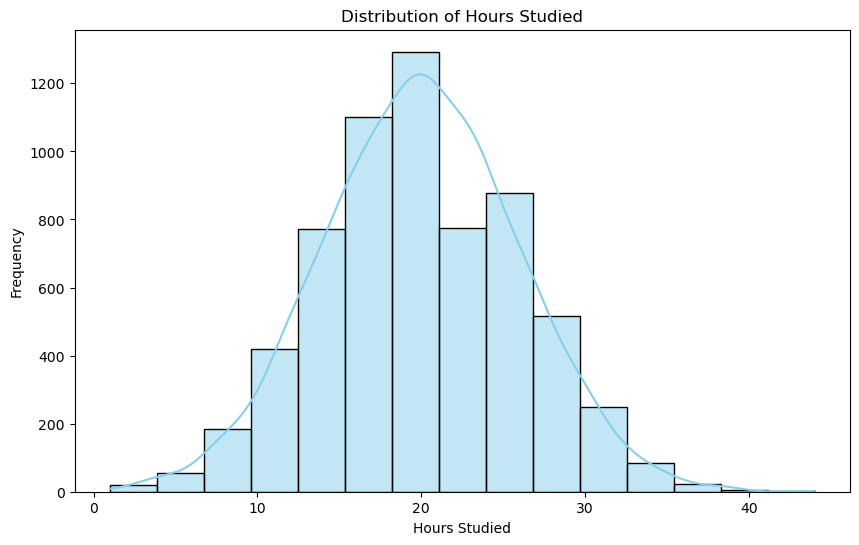

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_Studied'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()

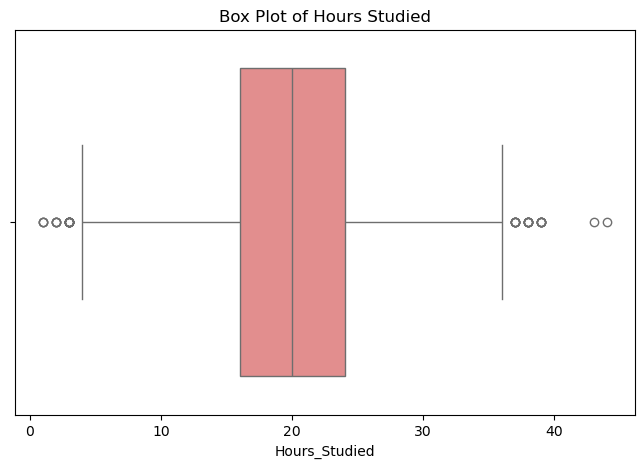

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Hours_Studied', color='lightcoral')
plt.title('Box Plot of Hours Studied')
plt.show()

### Possible correlations
 - Exam Scores
 - Motivation lvl
 - Sleep Hours
   

Correlation between Hours_Studied and Exam_Score:
               Hours_Studied  Exam_Score
Hours_Studied       1.000000    0.445104
Exam_Score          0.445104    1.000000


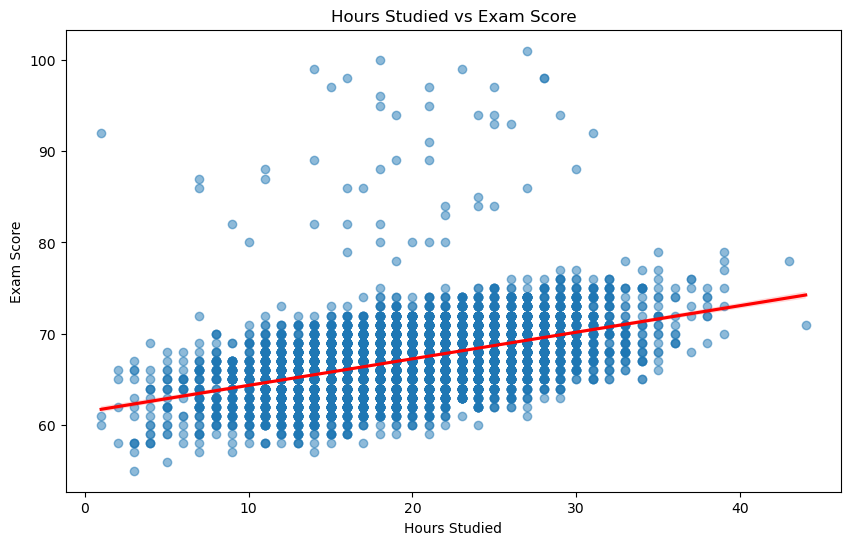

In [137]:
# Correlation with Exam Scores
correlation = df[['Hours_Studied', 'Exam_Score']].corr()
print(f"Correlation between Hours_Studied and Exam_Score:")
print(correlation)

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

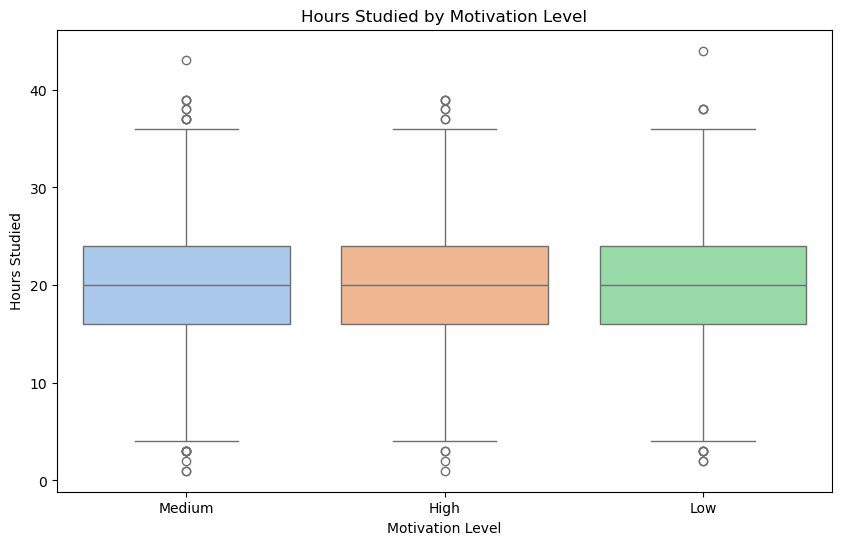

In [154]:
# Plotting Study Hours by Motivation Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Motivation_Level', y='Hours_Studied', hue="Motivation_Level", palette='pastel')
plt.title('Hours Studied by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Hours Studied')
plt.show()

Correlation between Hours_Studied and SleepHours:                Hours_Studied  Sleep_Hours
Hours_Studied       1.000000     0.013119
Sleep_Hours         0.013119     1.000000


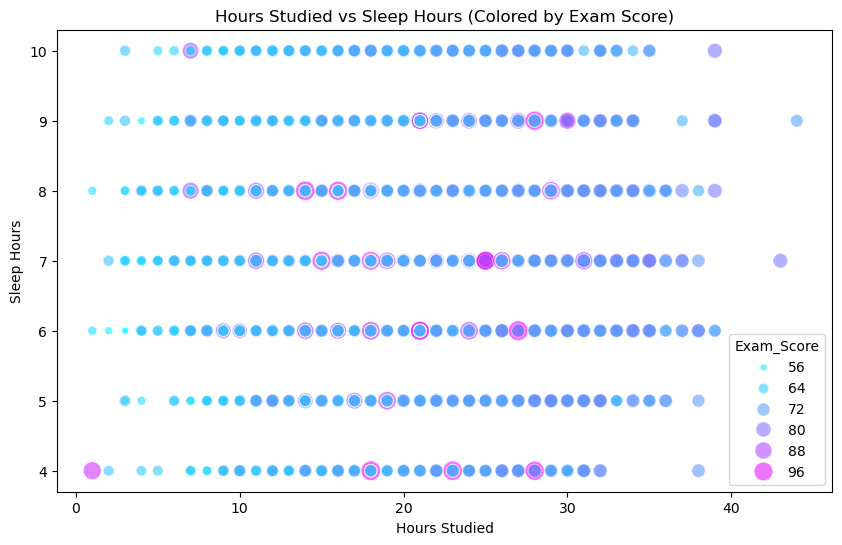

In [106]:
# Correlation with hour sleep
correlation = df[['Hours_Studied', 'Sleep_Hours']].corr()
print(f"Correlation between Hours_Studied and SleepHours: {correlation}")

# Scatter Plot: Hours Studied vs Sleep Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Sleep_Hours', hue='Exam_Score', palette='cool', size='Exam_Score', sizes=(20, 200), alpha=0.6)
plt.title('Hours Studied vs Sleep Hours (Colored by Exam Score)')
plt.xlabel('Hours Studied')
plt.ylabel('Sleep Hours')
plt.show()

## Attendance
 - *Data Type* : int (percentage)
### Variable Distribution
 - Histogram
 - Boxplot

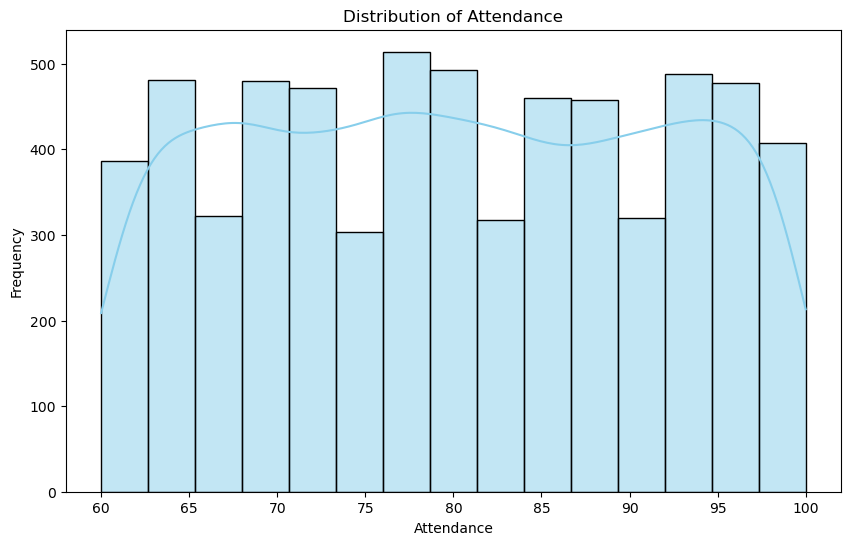

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Attendance'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

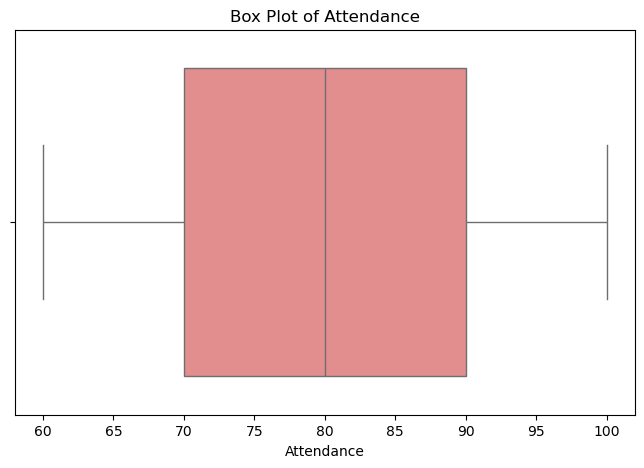

In [129]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Attendance', color='lightcoral')
plt.title('Box Plot of Attendance')
plt.show()

### Possible correlations
 - Exam Scores
 - Motivation lvl
 - Distance From Home
 - Teacher quality

Correlation between Attendance and Exam_Score:
            Attendance  Exam_Score
Attendance    1.000000    0.580259
Exam_Score    0.580259    1.000000


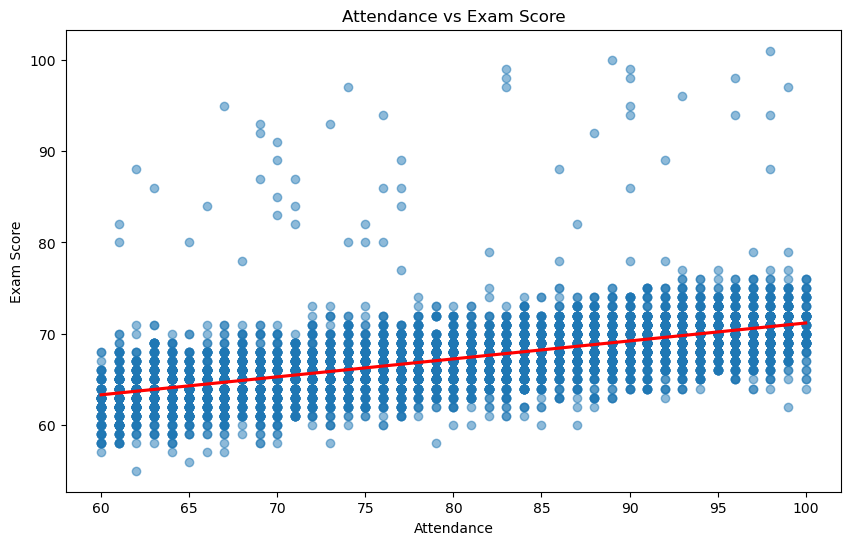

In [144]:
# Correlation with Exam Scores
correlation = df[['Attendance', 'Exam_Score']].corr()
print(f"Correlation between Attendance and Exam_Score:")
print(correlation)

# Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x='Attendance', y='Exam_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.show()

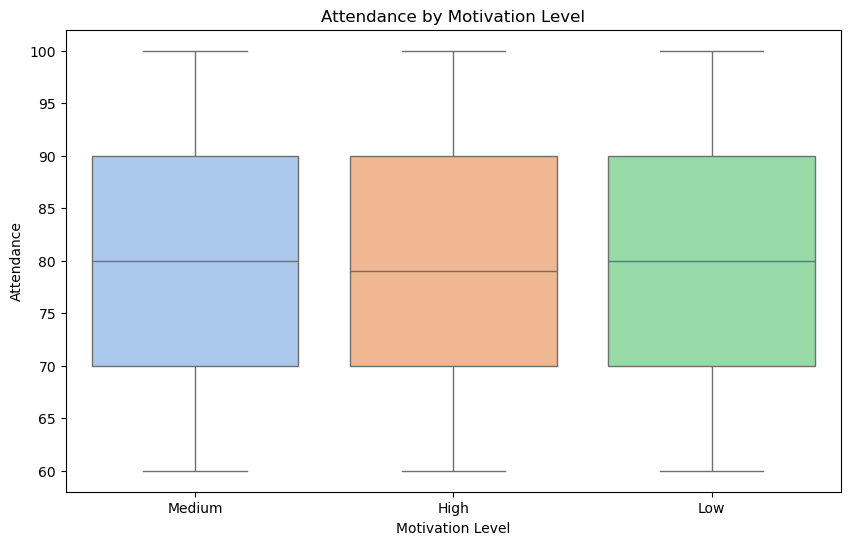

In [152]:
# Plotting Attendance vs Exam Score by Motivation Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Motivation_Level', y='Attendance', hue="Motivation_Level", palette='pastel')
plt.title('Attendance by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Attendance')
plt.show()

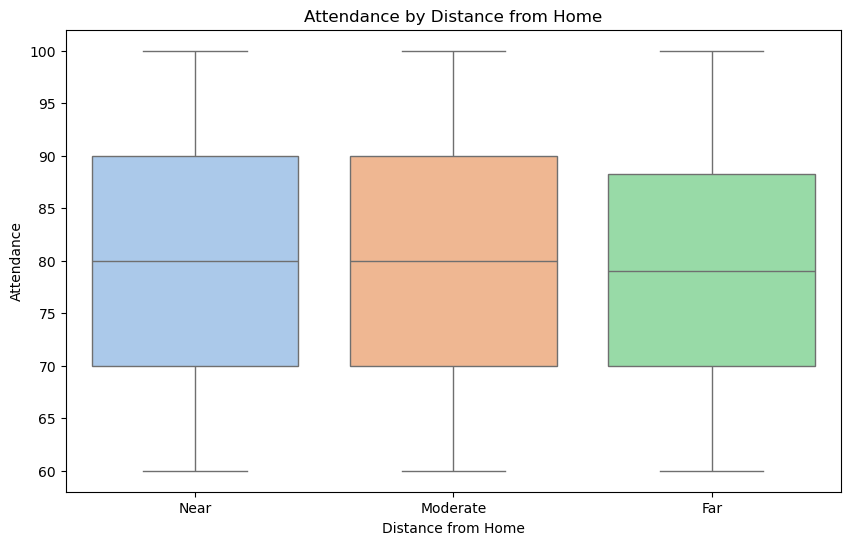

In [164]:
# Plotting Attendance by Distance From Home
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Distance_from_Home', y='Attendance', hue="Distance_from_Home", palette='pastel')
plt.title('Attendance by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Attendance')
plt.show()

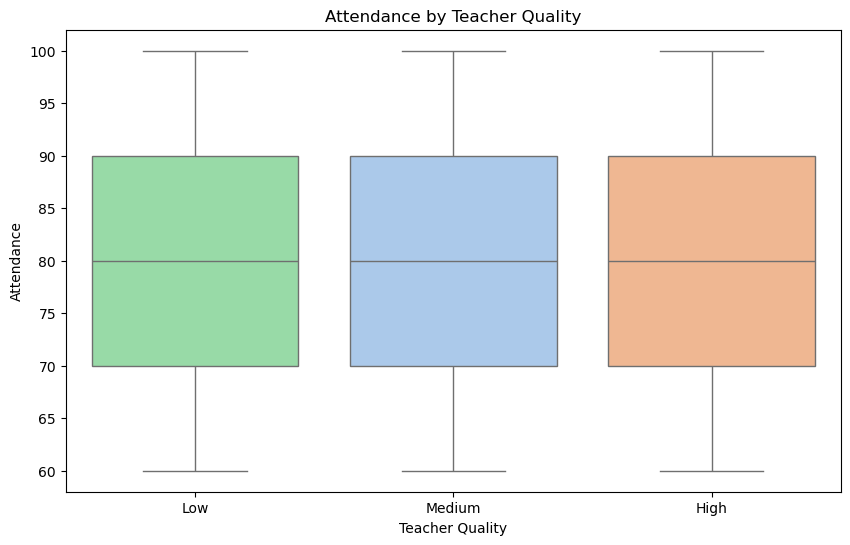

In [180]:
# Plotting Attendance by Teacher Quality
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Teacher_Quality', y='Attendance', hue="Teacher_Quality", palette='pastel',order=['Low', 'Medium', 'High'])
plt.title('Attendance by Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('Attendance')
plt.show()